# Fokker-Planck Equation - Example Analysis (preview)

Let's explore a simple example of the Fokker-Planck equation: a **free particle undergoing Brownian motion in one dimension**.

### 1. The Physics: Free Brownian Motion

Imagine a tiny particle suspended in a fluid. It's constantly being bumped by the fluid molecules, causing it to jiggle randomly. This is Brownian motion. If there are no external forces acting on the particle (hence "free"), its movement is purely driven by these random collisions.

We are interested in how the *probability distribution* of finding the particle at a certain position changes over time.

### 2. The Fokker-Planck Equation

The general one-dimensional Fokker-Planck equation describes the evolution of the probability density function $P(x, t)$ for a stochastic process:

$$\frac{\partial P}{\partial t} = -\frac{\partial}{\partial x} [A(x, t) P] + \frac{1}{2} \frac{\partial^2}{\partial x^2} [B(x, t) P]$$

Where:
* $P(x, t)$ is the probability density of finding the particle at position $x$ at time $t$.
* $A(x, t)$ is the **drift coefficient**, representing the deterministic part of the motion (average velocity).
* $B(x, t)$ is the **diffusion coefficient**, representing the strength of the random fluctuations.

### 3. Deriving the Coefficients for Free Brownian Motion

For a free particle undergoing Brownian motion, we make the following assumptions:

* **No external forces:** This means there's no preferred direction of motion, so the average drift of the particle is zero.

    $$A(x, t) = 0$$

* **Constant diffusion:** The randomness of the collisions is uniform in space and time. We denote the diffusion coefficient by $D$.

    $$B(x, t) = 2D$$

    The factor of 2 is a common convention in the Fokker-Planck equation, often stemming from the Wiener process definition where variance is $2Dt$.

Substituting these coefficients into the Fokker-Planck equation:

$$\frac{\partial P}{\partial t} = -\frac{\partial}{\partial x} [0 \cdot P] + \frac{1}{2} \frac{\partial^2}{\partial x^2} [2D \cdot P]$$

$$\frac{\partial P}{\partial t} = 0 + \frac{1}{2} \cdot 2D \frac{\partial^2 P}{\partial x^2}$$

$$\frac{\partial P}{\partial t} = D \frac{\partial^2 P}{\partial x^2}$$

This is the famous **diffusion equation**! It describes how a probability distribution (or concentration, or heat) spreads out over time due to random motion.

### 4. Solution of the Diffusion Equation

We need an initial condition for $P(x, t)$. Let's assume the particle starts at a specific position, say $x=0$, at $t=0$. This can be represented by a Dirac delta function:

$$P(x, 0) = \delta(x)$$

The solution to the diffusion equation with this initial condition is a Gaussian distribution:

$$P(x, t) = \frac{1}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right)$$

Let's check this solution:

**Normalization:** The integral of $P(x, t)$ over all $x$ should be 1 (total probability).

$$\int_{-\infty}^{\infty} \frac{1}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right) dx = 1$$

This is a standard Gaussian integral, and it does indeed integrate to 1.

**At $t \to 0$:**
As $t \to 0$, the standard deviation $\sigma = \sqrt{2Dt}$ goes to zero, and the peak height goes to infinity, approaching a delta function at $x=0$.

**Taking partial derivatives:**
Let's verify if it satisfies the diffusion equation:

$$\frac{\partial P}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right) \right)$$

$$= \frac{1}{\sqrt{4 \pi D}} \left( -\frac{1}{2} t^{-3/2} \exp\left(-\frac{x^2}{4 D t}\right) + t^{-1/2} \exp\left(-\frac{x^2}{4 D t}\right) \left( \frac{x^2}{4 D} t^{-2} \right) \right)$$

$$= P(x,t) \left( -\frac{1}{2t} + \frac{x^2}{4 D t^2} \right)$$

Now for the second spatial derivative:

$$\frac{\partial P}{\partial x} = \frac{1}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right) \left( -\frac{2x}{4 D t} \right)$$

$$= P(x,t) \left( -\frac{x}{2 D t} \right)$$

$$\frac{\partial^2 P}{\partial x^2} = \frac{\partial}{\partial x} \left[ P(x,t) \left( -\frac{x}{2 D t} \right) \right]$$

$$= \left( \frac{\partial P}{\partial x} \right) \left( -\frac{x}{2 D t} \right) + P(x,t) \left( -\frac{1}{2 D t} \right)$$

Substitute $\frac{\partial P}{\partial x}$:

$$= \left[ P(x,t) \left( -\frac{x}{2 D t} \right) \right] \left( -\frac{x}{2 D t} \right) + P(x,t) \left( -\frac{1}{2 D t} \right)$$

$$= P(x,t) \left( \frac{x^2}{4 D^2 t^2} - \frac{1}{2 D t} \right)$$

Now, substitute back into the diffusion equation $\frac{\partial P}{\partial t} = D \frac{\partial^2 P}{\partial x^2}$:

$$P(x,t) \left( -\frac{1}{2t} + \frac{x^2}{4 D t^2} \right) = D \cdot P(x,t) \left( \frac{x^2}{4 D^2 t^2} - \frac{1}{2 D t} \right)$$

$$-\frac{1}{2t} + \frac{x^2}{4 D t^2} = \frac{x^2}{4 D t^2} - \frac{D}{2 D t}$$

$$-\frac{1}{2t} + \frac{x^2}{4 D t^2} = \frac{x^2}{4 D t^2} - \frac{1}{2 t}$$

The equation holds! The Gaussian distribution is indeed the solution.

### 5. Python Modeling and Visualization

We can use Python to visualize how this probability distribution spreads out over time.

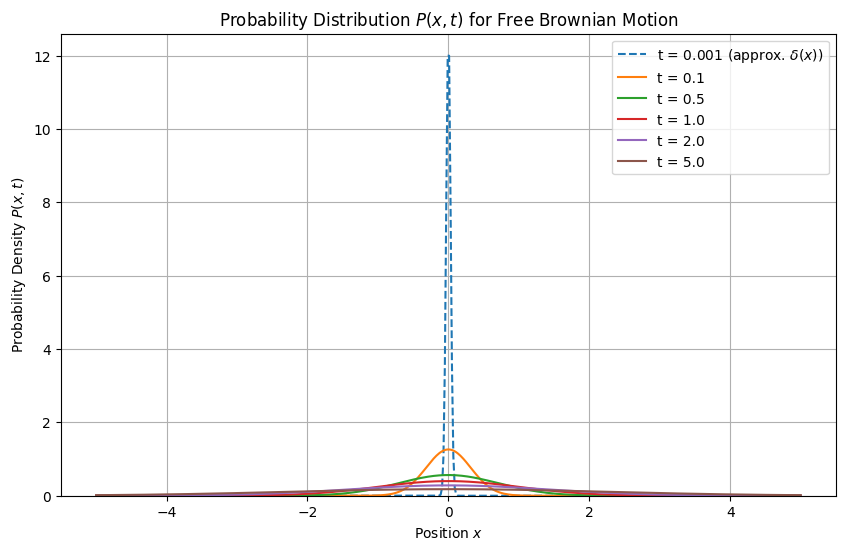

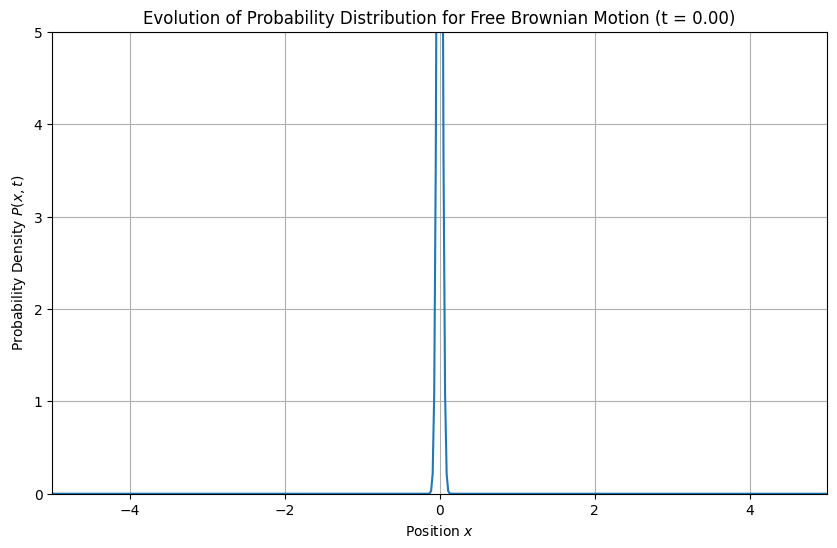

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.animation as animation
from IPython.display import HTML

# Parameters
D = 0.5  # Diffusion coefficient
x_min = -5  # Minimum x value for plotting
x_max = 5   # Maximum x value for plotting
num_points = 500 # Number of x points

x = np.linspace(x_min, x_max, num_points)

# Times to plot
times = np.array([0.001, 0.1, 0.5, 1.0, 2.0, 5.0]) # Add a very small time to represent initial condition spreading

plt.figure(figsize=(10, 6))

for t in times:
    if t == 0.001: # Approximate delta function for very small t
        # For very small t, the Gaussian is extremely narrow.
        # We can just plot a very narrow Gaussian for visualization, or represent it as a line.
        # Here we'll plot the Gaussian, which will appear very peaked.
        P_xt = (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))
        plt.plot(x, P_xt, label=f't = {t:.3f} (approx. $\\delta(x)$)', linestyle='--')
    else:
        P_xt = (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))
        plt.plot(x, P_xt, label=f't = {t:.1f}')

plt.title('Probability Distribution $P(x,t)$ for Free Brownian Motion')
plt.xlabel('Position $x$')
plt.ylabel('Probability Density $P(x,t)$')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0) # Ensure y-axis starts at 0
plt.show()


# --- Animation of the spreading distribution ---

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, np.zeros_like(x)) # Initialize with zeros
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 1.0) # Adjust ylim based on expected max density
ax.set_xlabel('Position $x$')
ax.set_ylabel('Probability Density $P(x,t)$')
ax.set_title('Evolution of Probability Distribution for Free Brownian Motion')
ax.grid(True)

# Function to update the plot for each frame
def update(frame):
    t = frame * 0.1 + 0.001 # Time starts from 0.001 and increases
    P_xt = (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))
    line.set_ydata(P_xt)
    ax.set_title(f'Evolution of Probability Distribution for Free Brownian Motion (t = {t:.2f})')
    # Dynamically adjust y-limit if the peak goes very high
    if t < 0.1: # For very small t, the peak is very high, limit it for better visualization
        ax.set_ylim(0, 5)
    else:
        ax.set_ylim(0, 1.0)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 100), blit=True)

# To display the animation in a Jupyter Notebook:
# HTML(ani.to_jshtml())
# To save the animation:
# ani.save('brownian_motion_spreading.gif', writer='pillow', fps=20)

plt.show() # This will show the animation window if not in a Jupyter notebook